In [160]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from algbench import read_as_pandas, Benchmark
import re

font = {'family': 'serif', 'size': 11}
matplotlib.rc('font', **font)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = [9, 3.5]

In [161]:
path = 'g6'
optimal_solutions = dict()
for row in Benchmark(f'results/classical_benchmark/{path}'):
    if row['parameters']['args']['solver'] == 'combo':
        optimal_solutions[row['parameters']['args']['instance']['name']] = row['result']['objective_value']
"""        
qtg_results = read_as_pandas('results/quantum_benchmark/qtg/easy', lambda row: {
    'algorithm': 'qtg',
    'size': row['parameters']['args']['instance']['size'],
    'elapsed_cycles': np.average([measure['cycle_count'] for measure in row['result']['measurements']]) +
                      np.average([measure['cycle_count_decomp'] for measure in row['result']['measurements']]),
    'memory_bits': np.average([measure['qubit_count'] for measure in row['result']['measurements']]),
    'average_gap': np.average([
        (optimal_solutions[row['parameters']['args']['instance']['name']] -
         measure['objective_value']) / optimal_solutions[row['parameters']['args']['instance']['name']]
        for measure in row['result']['measurements']]),
    'best_gap': np.min([
        (optimal_solutions[row['parameters']['args']['instance']['name']] -
         measure['objective_value']) / optimal_solutions[row['parameters']['args']['instance']['name']]
        for measure in row['result']['measurements']]),
    'success_probability': sum([1 for measure in row['result']['measurements'] if measure['objective_value'] == optimal_solutions[row['parameters']['args']['instance']['name']]]) / len(row['result']['measurements']),
    'instance': row['parameters']['args']['instance']['name']
})
"""

combo_results = read_as_pandas(f'results/classical_benchmark/{path}', lambda row: {
    'size': row['parameters']['args']['instance']['size'],
    'elapsed_cycles': row['result']['elapsed_cycles'],
    'elapsed_real_time': (row['result']['elapsed_real_time']),
    'instance': row['parameters']['args']['instance']['name'],
    'objective_value': row['result']['objective_value'],
    'memory_kb': row['result']['maximum_resident_size_kb']
} if row['parameters']['args']['solver'] == "combo" else None)
ctg_results = read_as_pandas(f'results/ctg/{path}', lambda row: {
    'algorithm': 'ctg',
    'algorithm_human_readable': 'CTG',
    'elapsed_cycles': np.average(row['result']['elapsed_cycles']),
    'qtg_estimate_cycles': np.average(
        [it * row['result']['qtg_cycles'] for it in row['result']['total_iterations']]),
    'success_probability': sum([1 for obj in row['result']['objective_values'] if
                                obj == optimal_solutions[row['parameters']['args']['instance']['name']]]) / len(
        row['result']['objective_values']),
    'size': row['parameters']['args']['instance']['size'],
    'instance': row['parameters']['args']['instance']['name'],
    'capacity': row['parameters']['args']['instance']['capacity'],
    'max_iter': row['parameters']['args']['alg_params']['max_iter_str'],
    'gap': np.average([(optimal_solutions[row['parameters']['args']['instance']['name']] - obj) / optimal_solutions[
        row['parameters']['args']['instance']['name']] for obj in row['result']['objective_values']]),
    'runtime': row['runtime']
})
ctg_results['g'] = ctg_results.apply(
    lambda row: int(re.match(r'.+\_g\_([0-9]+)\_.+', row['instance']).group(1)), axis=1)

combo_results['g'] = combo_results.apply(
    lambda row: int(re.match(r'.+\_g\_([0-9]+)\_.+', row['instance']).group(1)), axis=1)

In [171]:
missing_instances = set(combo_results['instance'].unique()) - set(ctg_results['instance'].unique())
print(missing_instances)

set()


Text(0.5, 1.0, 'Capacity=10000000000, g=[3 6 5 4 2], max_iter=700 + n^2 / 16')

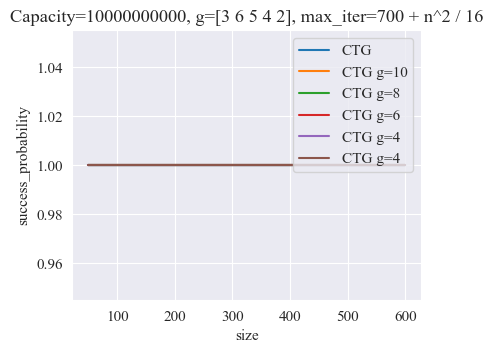

In [163]:
fig, ax = plt.subplots(figsize=(4.5, 3.5))
#sns.lineplot(qtg_results, x='size', y='success_probability', ax=ax, label="QTG")
sns.lineplot(ctg_results, x='size', y='success_probability', ax=ax, label="CTG")
sns.lineplot(ctg_results[ctg_results['g'] == 2], x='size', y='success_probability', ax=ax, label="CTG g=10")
sns.lineplot(ctg_results[ctg_results['g'] == 3], x='size', y='success_probability', ax=ax, label="CTG g=8")
sns.lineplot(ctg_results[ctg_results['g'] == 4], x='size', y='success_probability', ax=ax, label="CTG g=6")
sns.lineplot(ctg_results[ctg_results['g'] == 5], x='size', y='success_probability', ax=ax, label="CTG g=4")
sns.lineplot(ctg_results[ctg_results['g'] == 6], x='size', y='success_probability', ax=ax, label="CTG g=4")

assert len(ctg_results["capacity"].unique()) == 1
assert len(ctg_results["max_iter"].unique()) == 1
ax.set_title(
    f"Capacity={ctg_results['capacity'].unique()[0]}, g={ctg_results['g'].unique()}, max_iter={ctg_results['max_iter'].unique()[0]}")

In [165]:
ctg_results.groupby(['size', 'g']).describe()['success_probability'][['mean', 'max', 'min']]

mean  max  min
size g                
50   2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
100  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
150  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
200  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
250  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
300  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
350  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
400  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
450  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
500  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
550  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0
600  2   1.0  1.0  1.0
     3   1.0  1.0  1.0
     4   1.0  1.0  1.0
     5   1.0  1.0  1.0
     6   1.0  1.0  1.0

In [143]:
ctg_results[ctg_results['g'] == 6].groupby('size').describe()['runtime'][['mean', 'max', 'min']]

,mean,max,min
size,,,
50,3.387871,3.387871,3.387871
100,9.979205,9.979205,9.979205
150,18.938028,18.938028,18.938028
200,33.875272,33.875272,33.875272
250,40.760408,40.760408,40.760408
300,46.815553,46.815553,46.815553
350,79.982158,79.982158,79.982158
400,114.786417,114.786417,114.786417
450,122.999043,122.999043,122.999043


In [144]:
combo_results[combo_results['g'] == 6].groupby('size').describe()['elapsed_real_time'][['mean', 'max', 'min']]

,mean,max,min
size,,,
50,0.27,0.27,0.27
100,0.30,0.30,0.30
150,0.46,0.46,0.46
200,0.83,0.83,0.83
250,1.50,1.50,1.50
300,2.58,2.58,2.58
350,4.63,4.63,4.63
400,7.21,7.21,7.21
450,9.56,9.56,9.56


Text(0.5, 1.0, 'Capacity=1000000, g=[ 3  5  9  4  6  7  8 10]')

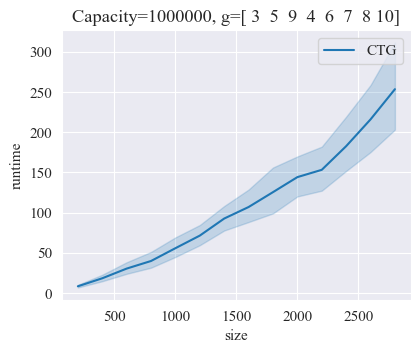

In [108]:
fig, ax = plt.subplots(figsize=(4.5, 3.5))
sns.lineplot(ctg_results, x='size', y='runtime', ax=ax, label="CTG")
ax.set_title(f"Capacity={ctg_results['capacity'].unique()[0]}, g={ctg_results['g'].unique()}")

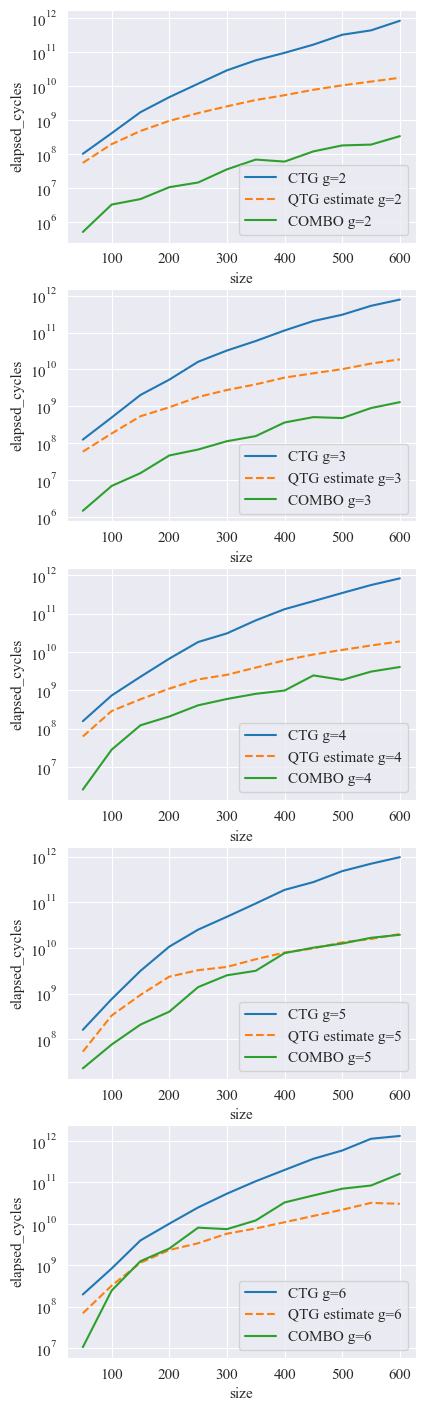

In [169]:
g_values = list(sorted(ctg_results['g'].unique()))
fig, axs = plt.subplots(figsize=(4.5, 3.5*len(g_values)), nrows=len(g_values))
#sns.lineplot(qtg_results, x='size', y='elapsed_cycles', ax=ax, label="QTG")

for i, g in enumerate(g_values):
    sns.lineplot(ctg_results[ctg_results["g"] == g], x='size', y='elapsed_cycles', ax=axs[i], label=f"CTG g={g}")
    sns.lineplot(ctg_results[ctg_results["g"] == g], x='size', y='qtg_estimate_cycles', ax=axs[i], label=f"QTG estimate g={g}", linestyle='--')
    sns.lineplot(combo_results[combo_results["g"] == g], x='size', y='elapsed_cycles', ax=axs[i], label=f"COMBO g={g}")
    #sns.lineplot(combo_results[combo_results["g"] > 4], x='size', y='elapsed_cycles', ax=ax, label="COMBO >4")
    axs[i].set_yscale('log')

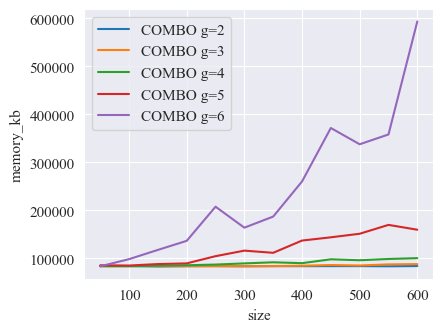

In [175]:
g_values = list(sorted(combo_results['g'].unique()))
fig, ax = plt.subplots(figsize=(4.5, 3.5))

for i, g in enumerate(g_values):
    sns.lineplot(combo_results[combo_results["g"] == g], x='size', y='memory_kb', ax=ax, label=f"COMBO g={g}")
